#                    CHENNAI WATER CRISIS - REFLECTION OVER THE YEARS
<img src = "images/train.png" />
 ##### Water Crisis In Chennai: Water supply by trains would be less than 2 per cent of city's daily demand.

Chennai is a city located in the Indian state Tamil Nadu. It serves as the capital of Tamil Nadu and the city and surrounding area serve as a major economic centers in India. 
Recently this area has been suffering from serious water shortages. This is due in part to two years of inadequate monsoon seasons, but increasing urbanization have caused some encroachment on water bodies in and around the region. In this notebook we are going through a dataset posted on Kaggle with the reservoir levels and rainfall levels in Chennai from 2004 until June 2019.

The city is facing an acute water shortage now (June 2019). Chennai is entirely dependent on ground water resources to meet its water needs. Ground water resources in Chennai are replenished by rain water and the city's average rainfall is 1,276 mm1. There are four reservoirs in the city, namely, Red Hills, Cholavaram, Poondi and Chembarambakkam, with a combined capacity of 11,057 mcft. These are the major sources of fresh water for the city.

We will be looking through to see if we can identify any trends in the data, and by providing visuals hopefully we can share just how dire the situation in Chennai is. Perhaps we can see whether or not the rainfall data included is tied to the reservoir levels.

Reservoir levels in the dataset are reported in million cubic feet (mcft) and rainfall levels are reported in millimeters (mm).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import seaborn as sns
import matplotlib as mpl

%matplotlib inline


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Here, we have imported the required modules. Now let us read the data from the csv files got from the Kaggle website.
We have two datasets to deal with, one dataset contains the reservoir data and the other contains the rainfall data. Each dataset contains four columns- 'POONDI','CHOLAVARAM','REDHILLS' and 'CHEMBARAMBAKKAM' which are the major sources of water to Chennai. 

In [2]:
reservoir=pd.read_csv("chennai_reservoir_levels.csv",parse_dates=['Date'])
rainfall=pd.read_csv("chennai_reservoir_rainfall.csv",parse_dates=['Date'])
reservoir.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-02-01,3.9,0.0,268.0,0.0
2,2004-03-01,3.9,0.0,267.0,0.0
3,2004-04-01,3.9,0.0,267.0,0.0
4,2004-05-01,3.8,0.0,267.0,0.0


Since both input files have the same format (a date column and then 4 columns specifying areas in Chennai and their respective reservoir/rainfall levels) we can define a standard method to read in the data, appropriately parse the date column, and return a sorted frame. We sort just in case the data itself does not come to us sorted.



In [3]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-02-01,0.0,0.0,0.0,0.0
2,2004-03-01,0.0,0.0,0.0,0.0
3,2004-04-01,0.0,0.0,0.0,0.0
4,2004-05-01,0.0,0.0,0.0,0.0


Here we read the initial values of the rainfall dataset,So first let's take a look at the data we have, we can verify that the two dataframes have the same format of rows and columns.

#### Let us analyze the maximum and the minimum amount of rainfall as well as the highest and the lowest reservoir levels.



In [4]:
print("Highest water level in Poondi: ",reservoir['POONDI'].max())
print("Highest water level in Cholavaram: ",reservoir['CHOLAVARAM'].max())
print("Highest water level in Redhills: ",reservoir['REDHILLS'].max())
print("Highest water level in Chembarambakkam: ",reservoir['CHEMBARAMBAKKAM'].max())

Highest water level in Poondi:  3231.0
Highest water level in Cholavaram:  896.0
Highest water level in Redhills:  3300.0
Highest water level in Chembarambakkam:  3396.0


Here we are going to analyze  the maximum water levels of the individual reservoir in Chennai and we can infer that Chembarambakkam has the highest water levels and Cholavaram has the highest water level of 896 mcft which is less compared to other regions.  

In [5]:
print("Lowest water level in Poondi: ",reservoir['POONDI'].min())
print("Lowest water level in Cholavaram: ",reservoir['CHOLAVARAM'].min())
print("Lowest water level in Redhills: ",reservoir['REDHILLS'].min())
print("Lowest water level in Chembarambakkam: ",reservoir['CHEMBARAMBAKKAM'].min())

Lowest water level in Poondi:  0.9
Lowest water level in Cholavaram:  0.0
Lowest water level in Redhills:  0.0
Lowest water level in Chembarambakkam:  0.0


Here we are going to analyze the minimum water levels of the individual reservoir in Chennai and we can infer that the regions Cholavaram,Redhills,Chembarambakkam has reservoir levels of 0 and Poondi has min reservoir levels of 0.9 mcft by which we can say that the three regions faced some water crises during this days.

In [6]:
print("Highest rainfall in Poondi: ",rainfall['POONDI'].max())
print("Highest rainfall in Cholavaram: ",rainfall['CHOLAVARAM'].max())
print("Highest rainfall in Redhills: ",rainfall['REDHILLS'].max())
print("Highest rainfall in Chembarambakkam: ",rainfall['CHEMBARAMBAKKAM'].max())

Highest rainfall in Poondi:  300.0
Highest rainfall in Cholavaram:  293.0
Highest rainfall in Redhills:  320.0
Highest rainfall in Chembarambakkam:  475.0


In this section we have analyzed the maximum rainfall of all the reservoirs in Chennai and the maximum rainfall is in Chembarambakkam and the Cholavarum has max rainfall of 293.0 mm which is less compared to other regions over the years,hence the regions must take some measures like afforestation to increase the rainfall.

In [7]:
print("Lowest rainfall in Poondi: ",rainfall['POONDI'].min())
print("Lowest rainfall in Cholavaram: ",rainfall['CHOLAVARAM'].min())
print("Lowest rainfall in Redhills: ",rainfall['REDHILLS'].min())
print("Lowest rainfall in Chembarambakkam: ",rainfall['CHEMBARAMBAKKAM'].min())

Lowest rainfall in Poondi:  0.0
Lowest rainfall in Cholavaram:  0.0
Lowest rainfall in Redhills:  0.0
Lowest rainfall in Chembarambakkam:  0.0


Here we can see that the minimum rainfall is zero in all the four regions,which shows the scarcity of rainfall in Chennai,hence there are days in which the rainfall level is absolutely zero.

In [8]:
reservoir.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,1133.272203,240.020572,1568.345573,1321.381645
std,1026.009311,274.601731,890.363617,957.057834
min,0.900000,0.000000,0.000000,0.000000
25%,213.000000,22.300000,849.000000,471.500000
50%,782.000000,92.000000,1630.000000,1225.000000
75%,2006.000000,460.000000,2236.000000,2083.000000
max,3231.000000,896.000000,3300.000000,3396.000000


It gives the different possible important values from the dataset reservoir which are useful for the further analysis.Lets also take a look at a quick description of the columns so we can get an idea of the range of values we have to work with.
  Great, so both frames have the same number of rows, again there are no missing values, and we have got some extra information about the distribution of values. Let's take some time to make a few remarks on the data that we're seeing. Firstly, the mean value of the reservoir levels varies between each reservoir, however Cholavaram has the lowest reservoir levels of any reservoir in the dataset. We can surmise that while Cholavaram does provide much needed water to Chennai, it's contribution is quite low.

In [9]:
rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862
std,12.755029,14.078840,15.060551,16.287227
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


It gives the different possible important values from the dataset rainfall which are useful for the further analysis.
    Also of note, the rainfall levels are very sparse. We see that there are a large number of 0 values, implying that rainfall is nowhere near a daily occurrence in this region. Also, for the most part the rainfall means across all regions are very similar, which we might expect, although the standard deviations and maximums are different. That could imply that we have some faulty data or that some regions are simply slightly more prone to rain than others.
  

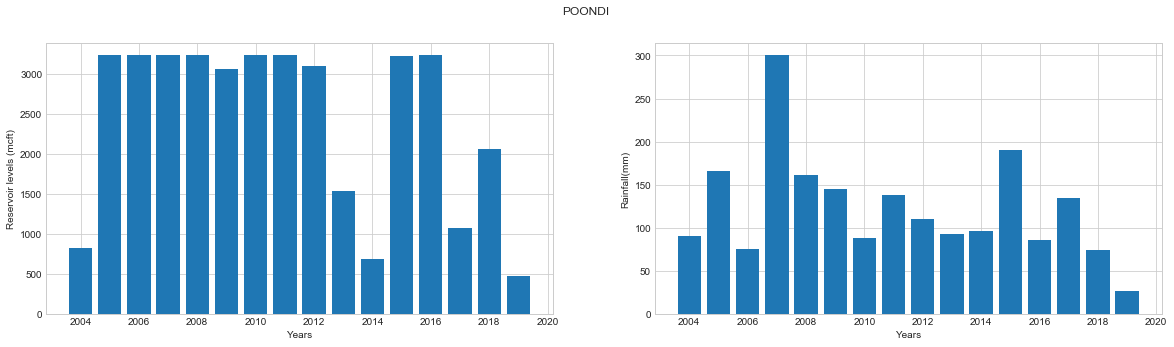

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['POONDI'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels (mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['POONDI'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('POONDI')

 In the first column we are plotting reservoir levels vs years (2004 to 2019) and in the second column we are plotting rainfall vs years (2004 to 2019) which gives us the clear picture of the reservoir and rainfall levels in Poondi.
  From the first plot we can see that the reservoir level is less in 2004 and 2014.And correlating with the rainfall we can see that there was moderate rainfall in year 2004 and 2014 so there might have been huge requirement of water during these years.

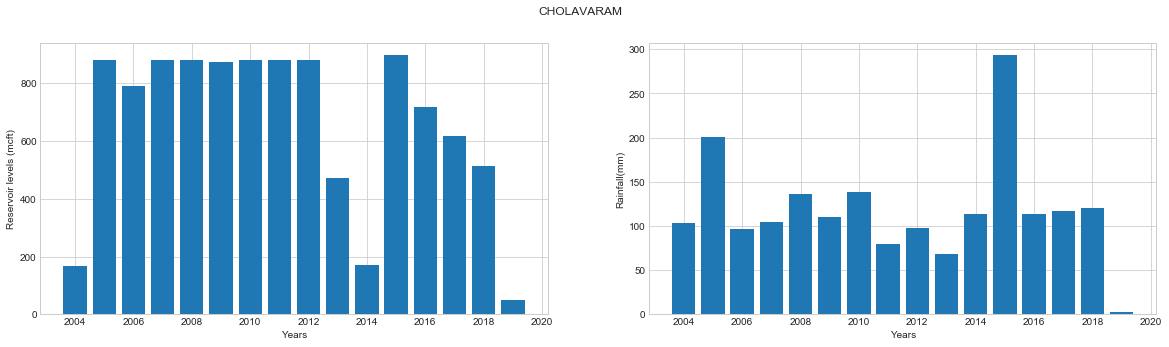

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['CHOLAVARAM'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels (mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['CHOLAVARAM'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('CHOLAVARAM')

In the first column we are plotting reservoir levels vs years (2004 to 2019) and in the second column we are plotting rainfall vs years (2004 to 2019) which gives us the clear picture of the reservoir and rainfall levels in Cholavaram. There seems to be an even distribution of rainfall in this particular region.
The reservoir level has gone below 2000 mcft for three times.  It also seems that the reservoir level is constantly going down year after year starting from 2015. This can be due to the improper maintenance of lakes.

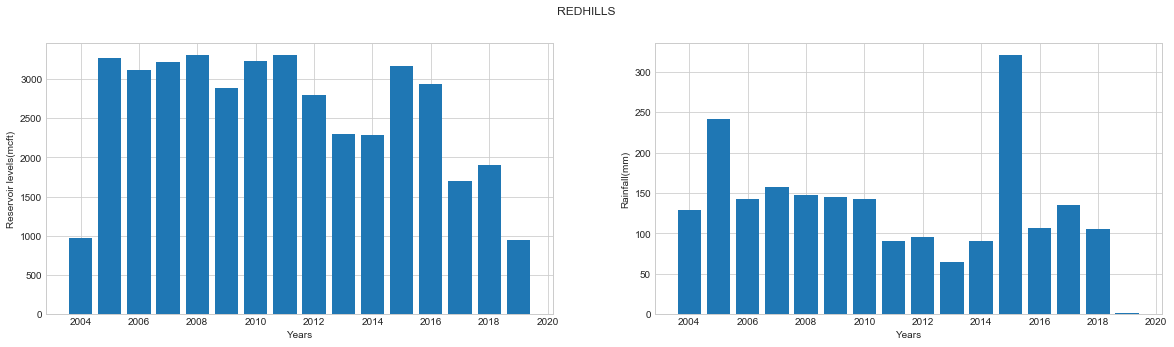

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['REDHILLS'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels(mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['REDHILLS'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('REDHILLS')

In the first column we are plotting reservoir levels vs years (2004 to 2019) and in the second column we are plotting rainfall vs years (2004 to 2019) which gives us the clear picture of the reservoir and rainfall levels in Redhills. The rainfall is evenly distributed in redhills region as well.
The reservoir level also hasn't dipped significantly in the Redhills. Again the reservoir level seems to be decreasing. Hence it is important that the concerned officials take up the responsibility to maintain the reservoir properly. 

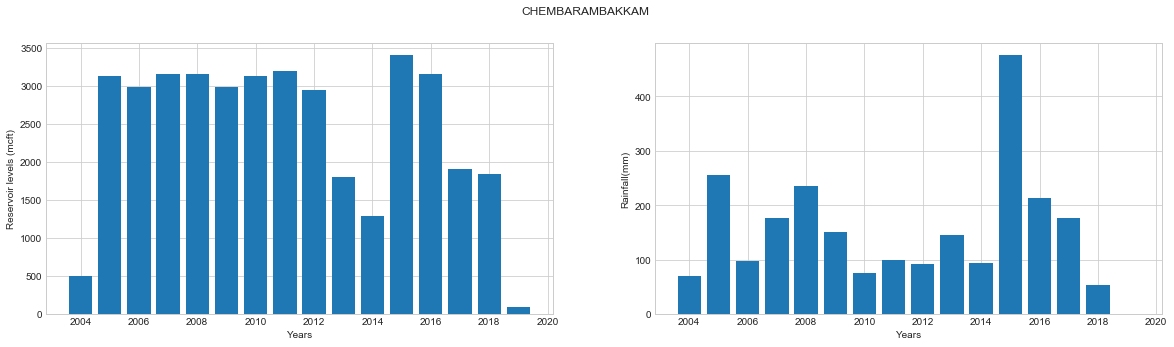

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['CHEMBARAMBAKKAM'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels (mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['CHEMBARAMBAKKAM'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('CHEMBARAMBAKKAM')

In the first column we are plotting reservoir levels vs years (2004 to 2019) and in the second column we are plotting rainfall vs years (2004 to 2019) which gives us the clear picture of the reservoir and rainfall levels in Chembarambakkam.
The rainfall levels in the Chembarambakkam region is significantly low. The hike in rainfall is evident only in the year of 2015.
The reservoir levels has also decreased as compared to the earlier years (2005-2012). The required analysis on the seepage of the lake bed has to be carried out and necessary steps have to be taken to ensure good amount of water prevails in this reservoir. 

In [14]:
res_year = reservoir.groupby(reservoir.Date.dt.year).sum().reset_index()
rain_year = rainfall.groupby(rainfall.Date.dt.year).sum().reset_index()
res_year

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004,28462.71,6976.00,80849.10,25138.00
1,2005,263778.42,53936.70,535995.46,212191.00
2,2006,667057.00,177006.00,746190.00,757491.00
3,2007,655143.00,104533.00,860179.00,626021.00
4,2008,681616.00,199693.00,894929.00,804090.00
5,2009,673871.00,151431.97,718951.89,655422.15
6,2010,602806.00,139494.00,746524.00,737483.00
7,2011,875660.00,182321.00,939264.00,909683.00
8,2012,637871.00,82692.00,685232.00,575234.00
9,2013,195988.00,36518.00,483300.00,360972.00


It is important that we analyze the dataset given to us in terms of years. In the dataset we have day-wise data. In order to clearly represent the reservoir levels and rainfall levels we can group the data in terms of years. Year wise analysis will make it simpler for us to act on the water conserving activities depending on the difficulties that we faced during earlier years. This gives us the pre-requsite knowledge in order to deal with the situation in a better way.

In [15]:
rain_year

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004,1099.00,1230.0,1158.4,952.00
1,2005,2031.00,2253.0,2395.5,2428.00
2,2006,1035.00,1330.0,1328.0,1488.00
3,2007,1703.00,1400.0,1531.4,1353.00
4,2008,1524.00,1685.0,1755.0,1578.00
5,2009,982.85,1089.0,1281.0,1542.00
6,2010,1120.50,1914.0,1649.6,1449.00
7,2011,1391.20,1141.2,1515.4,2019.00
8,2012,1100.60,909.0,932.7,824.30
9,2013,1119.00,950.0,1033.4,1262.55


The grouping of data of the rainfall according to years will help us to identify the drought years. This identification will then help us to device plans for future. 
Here, again the analysis will help us in the way in which the people and lifestock suffered during drought year can be identified. Hence, necessary actions can be taken to overcome such adverseries. 

In [16]:
res_year1=pd.melt(res_year,id_vars=["Date"])
res_year1


,Date,variable,value
0,2004,POONDI,28462.71
1,2005,POONDI,263778.42
2,2006,POONDI,667057.00
3,2007,POONDI,655143.00
4,2008,POONDI,681616.00
5,2009,POONDI,673871.00
6,2010,POONDI,602806.00
7,2011,POONDI,875660.00
8,2012,POONDI,637871.00
9,2013,POONDI,195988.00


This function "melt" is useful to alter a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.


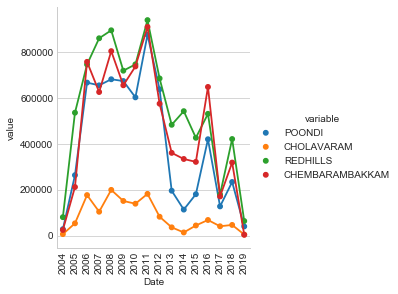

In [17]:
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('whitegrid')
g = sns.factorplot(x="Date", y="value", hue='variable',data=res_year1)
g.set_xticklabels(rotation=90)

In this plot we are showing the avg water levels of 4 different regions for every year using seaborn.
The grouping of the columns using the melt function will allow us plot the graphs which includes all the reservoirs. This kind will help us compare the water levels in each reservoir levels with each other.
We can also observe that the trend among the reservoir levels is quite similar. We also see that the reservoir level in Cholavaram is very low compared to the other reservoirs. Probably the maximum capacity of Cholavaram is comparitively less.

In [18]:
rain_year1=pd.melt(rain_year,id_vars=["Date"])
rain_year1.head(20)

,Date,variable,value
0,2004,POONDI,1099.00
1,2005,POONDI,2031.00
2,2006,POONDI,1035.00
3,2007,POONDI,1703.00
4,2008,POONDI,1524.00
5,2009,POONDI,982.85
6,2010,POONDI,1120.50
7,2011,POONDI,1391.20
8,2012,POONDI,1100.60
9,2013,POONDI,1119.00


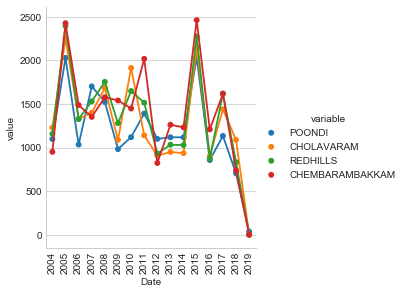

In [19]:
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('whitegrid')
g = sns.factorplot(x="Date", y="value", hue='variable',data=rain_year1)
g.set_xticklabels(rotation=90)

Here we are analyzing the total rainfall levels of 4 regions for every year using seaborn.Again the rainfall levels is pretty similar in all the regions.The grouping of the columns using the melt function will allow us plot the graphs which includes all the rainfalls.We can see that rainfall is more in Chembarambakkam comparitivity to others and also we can tell that there is a moderate rainfall in all the regions. But the rainfall has been decreased in recent years compared to the previous years.

In [20]:
res_year_aggregate = res_year.iloc[:, 1:].sum(axis=1)
res_year_aggregate

0      141425.81
1     1065901.58
2     2347744.00
3     2245876.00
4     2580328.00
5     2199677.01
6     2226307.00
7     2906928.00
8     1981029.00
9     1076778.00
10    1005037.00
11     973800.50
12    1668102.00
13     519473.00
14    1021041.00
15     113826.00
dtype: float64

In this section we are going to get the aggregate water levels of all the four regions from 2004 to 2019.It can tell us the overall water levels of each reservior every year.From this we can tell that water level is increased from 2004 to 2011.After that the water level has been decreasing over the years from 2012 to 2019.From the analysis there are chances of reservior levels being less or decreasing in 2019 compared to other years.

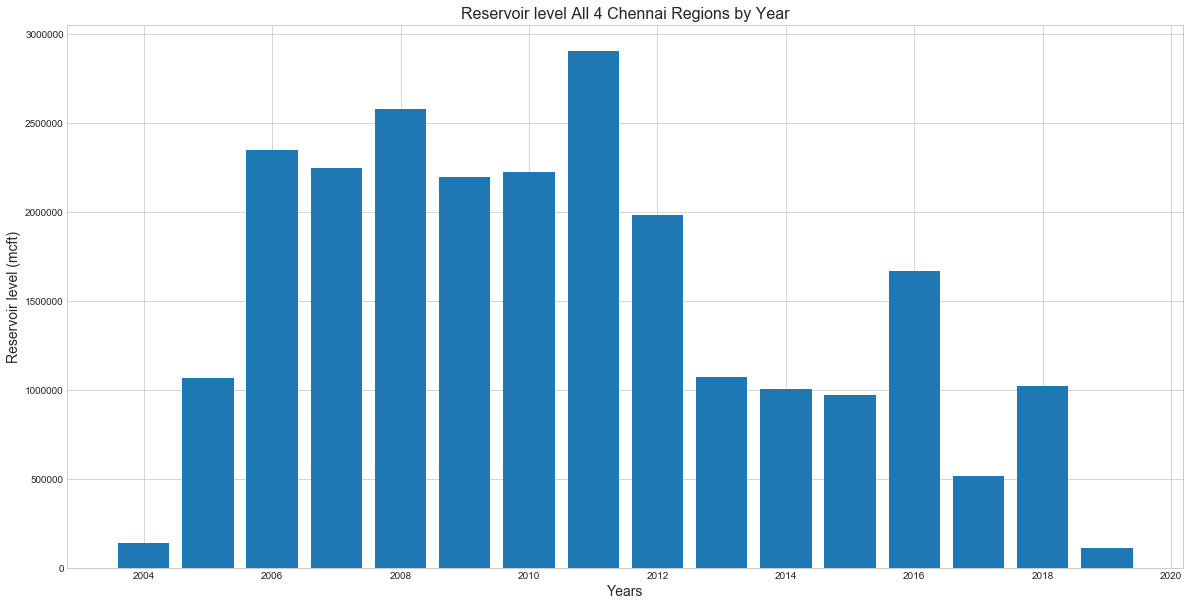

In [21]:
plt.figure(figsize=(20, 10))
plt.bar(res_year['Date'], res_year_aggregate)
plt.ylabel('Reservoir level (mcft)', size=14)
plt.xlabel('Years',size=14)
plt.title('Reservoir level All 4 Chennai Regions by Year', size=16)

In this plot we can observe the reservoir level of all four regions from 2004 to 2019.From the above plot we can conclude that water level in the reservoir less in 2004 and 2019.The reservoir level in the year 2019 cannot be considered as lowest because we have dataset only till june and highest water level in 2011.It can tell us that the reservoir level has been decreasing from 2011 to 2019. In 2019 the water level in the reservoir is still less compared to all other years.  

In [22]:
rain_year_aggregate = rain_year.iloc[:, 1:].sum(axis=1)
rain_year_aggregate

0     4439.40
1     9107.50
2     5181.00
3     5987.40
4     6542.00
5     4894.85
6     6133.10
7     6066.80
8     3766.60
9     4364.95
10    4318.00
11    8928.70
12    3845.80
13    5814.40
14    3367.00
15      41.00
dtype: float64

In this section we are going to get the aggregate rainfall of all the four regions from 2004 to 2019.We have rainfall level of all the four regions which is highest in the year 2005 and least in the year 2018 and we can also see that the rainfall level is decreasing from 2011 to 2018.

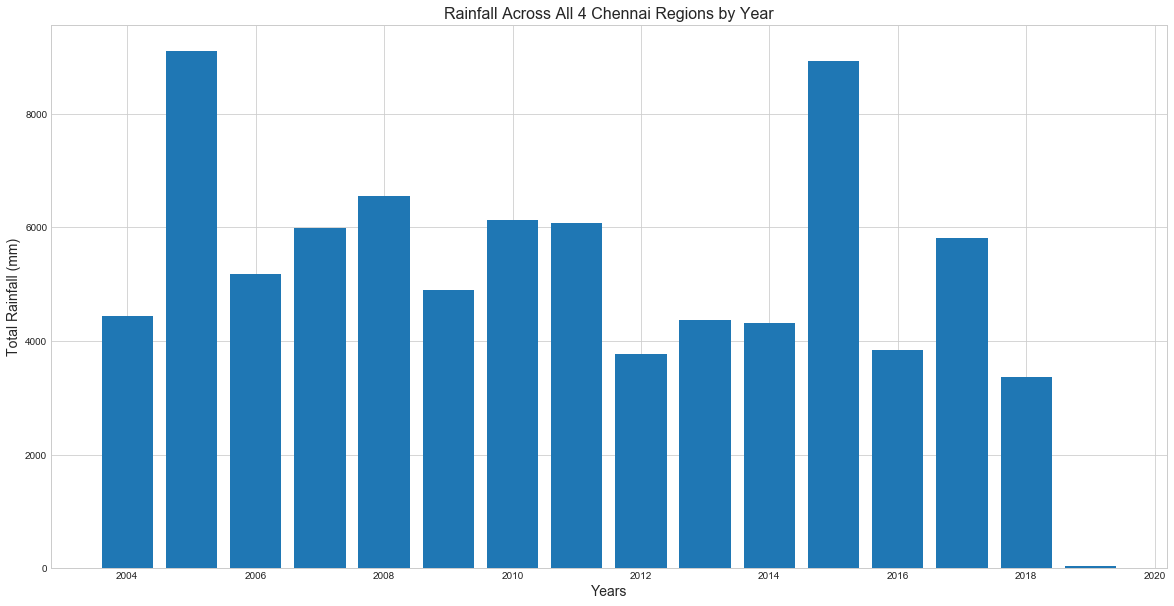

In [23]:
plt.figure(figsize=(20, 10))
plt.bar(rain_year['Date'], rain_year_aggregate)
plt.ylabel('Total Rainfall (mm)', size=14)
plt.xlabel('Years',size=14)
plt.title('Rainfall Across All 4 Chennai Regions by Year', size=16)


In this plot we can observe the rainfall level of all four regions from 2004 to 2019.From the above plot we can conclude that rainfall is less in 2019.The total rainfall in the year 2019 cannot be considered as lowest because we have dataset only till june and highest rainfall in 2005 and 2015.Since the rainfall levels are moderate from the year 2012 to 2018,it is required to take some serious measures to meet the daily requirement of water by Chennai governament.

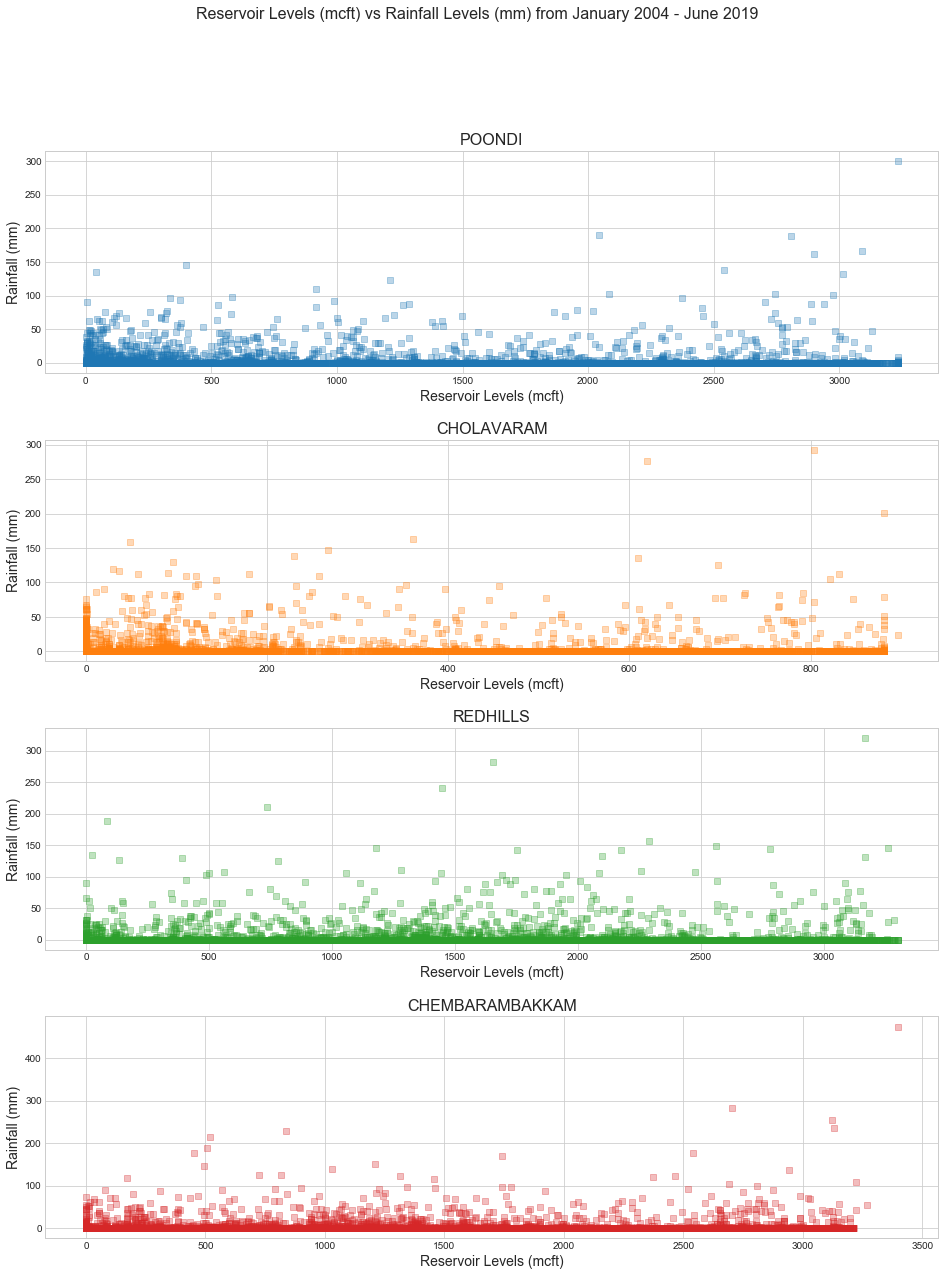

In [24]:
fig, ax = plt.subplots(4, 1, figsize=(16, 20))
for index, column in enumerate(reservoir.columns[1:]):
    ax[index].scatter(reservoir[column], rainfall[column],marker=',', color=colors[index], alpha=0.3)
    ax[index].set_ylabel('Rainfall (mm)', size=14)
    ax[index].set_title(column, size=16)
    ax[index].set_xlabel('Reservoir Levels (mcft)', size=14)
fig.suptitle('Reservoir Levels (mcft) vs Rainfall Levels (mm) from January 2004 - June 2019', size=16)
fig.subplots_adjust(hspace=0.3)

There doesn't seem to be much of a linear, or really any trend here. I plotted the colors with an alpha level of 0.3 so that we can easily see areas of high density vs areas of low density. A lot of the rainfall levels are zero despite the reservoir levels. We made the observation previously that the rainfall levels are mostly zero, so perhaps this isn't surprising; however if we didn't know exactly how unrelated these day-to-day data are this visual helps us clarify that there's not much to see here.

This tells us the total amount of rain that fell in each region per year and the total reservoir level through each year. If the sum across the entire year for reservoir levels is less than that of other years, we can assume that either the reservoir drained faster than in other years or that it wasn't filled enough in the given year. That'll give us insight as to which years were bad for the reservoirs.

In [25]:
res_months = reservoir.groupby(reservoir.Date.dt.month).sum().reset_index()
rain_months = rainfall.groupby(rainfall.Date.dt.month).sum().reset_index()

In [26]:
res_months

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,1,743108.48,178588.90,913601.70,769532.00
1,2,632145.58,140179.70,813898.20,658535.00
2,3,638623.68,130318.90,884665.20,701213.00
3,4,547819.40,100081.60,788328.40,630007.00
4,5,484922.50,86260.60,732631.26,617888.00
5,6,398161.40,71896.10,649966.73,552540.00
6,7,354022.10,70026.10,619217.10,528447.00
7,8,350438.50,66386.60,591675.30,506424.00
8,9,402253.49,68635.10,574049.70,488305.00
9,10,478319.30,90310.60,610533.17,519402.00


In this section we have grouped the data with respect to months. By this we can easily identify the amount of water level of reservoirs in each month. This analysis will help us in identifying the month in which there is highest amount of water level of reservoir.

In [27]:
rain_months

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,1,586.40,713.0,737.0,603.00
1,2,758.60,988.6,1012.8,1116.55
2,3,983.40,868.0,867.0,1085.50
3,4,1029.40,957.0,830.5,1045.50
4,5,1245.10,1215.0,1128.5,1402.50
5,6,1179.80,1409.0,1505.1,1533.40
6,7,1594.50,1828.2,1830.4,1889.50
7,8,2150.40,2055.0,2413.1,2180.50
8,9,1985.65,2047.0,2042.0,2107.10
9,10,2775.20,3473.0,3958.3,3993.00


In this we have the data corresponding to the rainfall in each month.By the above analysis we can see that Poondi had highest rainfall in the month of November and all the other regions of Chennai had highest rainfall in october month.We can also see that the summer season has the lowest rainfall levels in all the regions.    

In [28]:
res_months_all = res_months.iloc[:, 1:].sum(axis=1)
res_months_all

0     2604831.08
1     2244758.48
2     2354820.78
3     2066236.40
4     1921702.36
5     1672564.23
6     1571712.30
7     1514924.40
8     1533243.29
9     1698565.07
10    2268166.03
11    2621749.48
dtype: float64

Here we add the reservoir levels of Poondi, Cholavaram, Redhills, Chembarambakkam. From the above analysis it gives the total avaliable amount of water per month for the daily water usage in the Chennai. Since the reservoir levels are less from the month of june to september it is hard to meet the daily water usage of Chennai. 

In [29]:
rain_months_all = rain_months.iloc[:, 1:].sum(axis=1)
rain_months_all

0      2639.40
1      3876.55
2      3803.90
3      3862.40
4      4991.10
5      5627.30
6      7142.60
7      8799.00
8      8181.75
9     14199.50
10    13303.60
11     6371.40
dtype: float64

Here we add the amount of rainfall in every region- Poondi, Cholavaram, Redhills, Chembarambakkam.

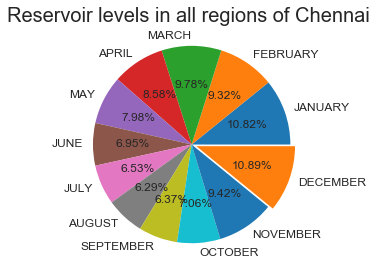

In [30]:
labels=['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
explode=[0,0,0,0,0,0,0,0,0,0,0,0.50]
plt.pie(res_months_all,labels=labels,radius=10,autopct='%0.2f%%',explode=explode,textprops={'fontsize': 12})
plt.suptitle('Reservoir levels in all regions of Chennai',size=20)
plt.axis('equal')
plt.show()

In the above pie plot, we can conclude that the reservoir level is the highest in the month of December accounting  for 10.89%. The month of January stands second accounting for 10.82%. Thus the reservoir levels will be highest soon after the Monsoon season in the Chennai region. From the analysis of pie chart we can see that the reservior levels goes on decrreasing from april to september because the rainfall level will be less in the summer season. Hence,there might be demand of the water during these months.  

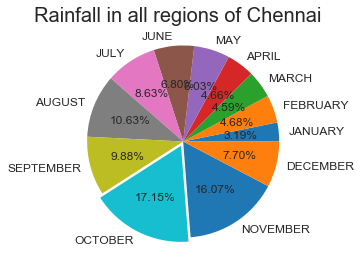

In [31]:
labels=['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
explode=[0,0,0,0,0,0,0,0,0,0.50,0,0]
plt.pie(rain_months_all,labels=labels,radius=10,autopct='%0.2f%%',explode=explode,textprops={'fontsize': 12})
plt.suptitle('Rainfall in all regions of Chennai',size=20)
plt.axis('equal')
plt.show()

In this pie plot we can conclude that the region of Chennai receives the Highest amount of rainfall in the month of October, accounting for 17.15%. November stands second with 16.07% of the rainfall. We can also observe that the amount of rainfall is very negligible in the dry season.Since the rainfall level is less from January to June which might lead to drought situation in the chennai.

In [32]:
is_february = reservoir['Date'].dt.month == 2
is_day_one = reservoir['Date'].dt.day == 1
dry_season_res_levels = reservoir.loc[is_february & is_day_one, :].reset_index(drop=True)
dry_season_res_levels

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-02-01,3.9,0.0,268.0,0.0
1,2005-02-01,799.9,69.0,996.0,397.0
2,2006-02-01,3231.0,762.0,3100.0,2986.0
3,2007-02-01,2940.0,471.0,2532.0,2344.0
4,2008-02-01,3098.0,880.0,3174.0,3120.0
5,2009-02-01,3045.0,869.0,2876.0,2972.0
6,2010-02-01,2252.0,713.0,2037.0,2486.0
7,2011-02-01,3231.0,814.0,3243.0,3130.0
8,2012-02-01,2928.0,859.0,2632.0,2866.0
9,2013-02-01,1523.0,471.0,2166.0,1241.0


It is important know the water level at the start of the dry season. This analysis gives us a clear picture of the amount of water present in order to cope with the demand for water. With this analysis we can plan the way in which the water can be released to various purposes such as irrigation, daily needs and industrial purposes. 

First let us just take a simple step to compare the sum of water levels at the beginning of summer (Let us take February 1st of every year). This is because there will not be any replenishment till the next monsoon and the amount of water stored in the four reservoirs itself will be clear indicator of how long can the water be managed during summer and whether there should be some backup plans.

In [33]:
dry_season_res_levels1=pd.melt(dry_season_res_levels,id_vars=["Date"])
dry_season_res_levels1.head(20)

,Date,variable,value
0,2004-02-01,POONDI,3.9
1,2005-02-01,POONDI,799.9
2,2006-02-01,POONDI,3231.0
3,2007-02-01,POONDI,2940.0
4,2008-02-01,POONDI,3098.0
5,2009-02-01,POONDI,3045.0
6,2010-02-01,POONDI,2252.0
7,2011-02-01,POONDI,3231.0
8,2012-02-01,POONDI,2928.0
9,2013-02-01,POONDI,1523.0


As we did earlier we are using melt function to group the different columns in our dataset under a single column called variable. As we can see above, we have reservoir level of each region on 1st of February every year (2004-2019). This also helps us in plotting the different reservoirs under a same plot. The plot is in the next section.

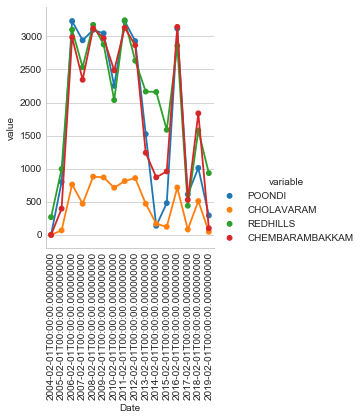

In [34]:
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('whitegrid')
h = sns.factorplot(x="Date", y="value", hue='variable',data=dry_season_res_levels1)
h.set_xticklabels(rotation=90)

In the plot we can see that the reservoir level dipped below 500 mcft for 14 times in 15 years.The year 2004 saw the reservoir Chembarambakkam, Cholavaram, Poondi, Redhills going nearly to level 0.The same pattern can be observed in the year 2019, where 3 reservoirs- Poondi, Cholavaram,Chembarambakkam nearing level 0. Hence, 2019 can also be considered critical for water requirements of the city Chennai.Since the water level of the reservoir is less in Cholavaram compared to other regions in the month of february and Cholavaram region must take some measures to control the water utility till the next rainy season.

In [35]:
dry_season_res_all_regions = dry_season_res_levels.iloc[:, 1:].sum(axis=1)
dry_season_res_all_regions

0       271.9
1      2261.9
2     10079.0
3      8287.0
4     10272.0
5      9762.0
6      7488.0
7     10418.0
8      9285.0
9      5401.0
10     3337.0
11     3152.0
12     9833.0
13     1666.0
14     4938.0
15     1376.0
dtype: float64

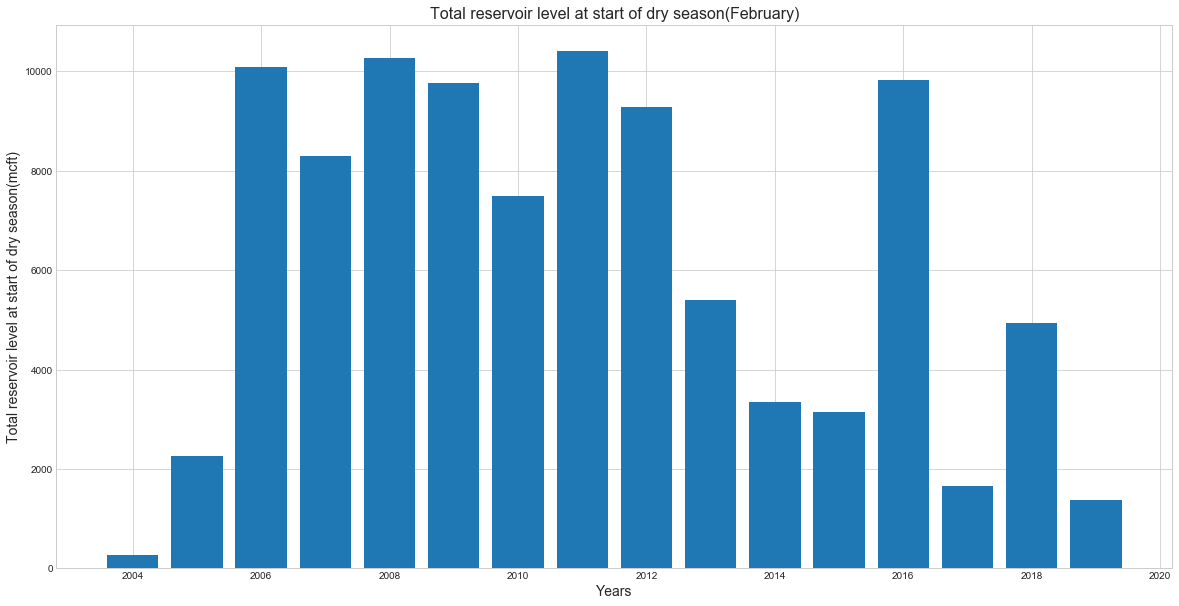

In [36]:
plt.figure(figsize=(20, 10))
plt.bar(dry_season_res_levels['Date'].dt.year,dry_season_res_all_regions)
plt.ylabel('Total reservoir level at start of dry season(mcft)', size=14)
plt.xlabel('Years',size=14)
plt.title('Total reservoir level at start of dry season(February)', size=16)

This plot consists of the total amount of water present in all the four rservoirs in Chennai. The total water level will give us the clear picture in plannning the way in which water can be distributed in Chennai. 
Again the observation made earlier in the each reservoir level can be confirmed here.
The year 2004 can now be classified as the drought year. 2005 also has only a little surge in the water level. Among the 15 years 2011 had the best reservoir level, the water level went beyond 10000mcft only 3 times in 15 years, in 2006,2008,2011.
2017 and 2019 have water level below 2000mcft.
In the year 2019, if the region doesnt receive good rainfall, there is going to be a water crisis for sure. Hence it is important for the concerned officials to plan accordingly.

## CONCLUSION AND FURTHER STEPS THAT CAN BE TAKEN
<img src="images/crisis.png"/>

So based on everything we've seen, we can tell that Chennai has experienced low reservoir levels before, and it appears that they are facing very low reservoir levels now during the current dry season, lower than most other years. We can also see that rainfall and reservoir levels are tied together, however this is much more apparent when we aggregate rainfall over the course of some number of days as opposed to simply viewing the daily data as is.

‘Day Zero’ (when all reservoirs go dry) is almost upon the city. It is imperative to start implementing sustainable solutions with a focus on integrated water resource management. Chennai, and other cities like it, could be water-secure again, but only if positive action begins now.

Harvest rainwater: The easiest technique for the city is to better enforce the existing rule on rainwater harvesting in buildings. Rapid urbanisation has increased the area covered by concrete, preventing groundwater recharge and rainwater absorption.

Reuse wastewater: The Cooum and Adyar rivers carry a huge amount of sewage into the sea every day. Multiple lakes across the city have also been affected by sewage dumping. Small sewage treatment plants combined with apartment-level treatment systems could help treat the sewage without using up more space.

Conserve lakes and flood plains: Chennai’s master plan must prioritise protection of lakes and associated flood plains. Flood plains are the biggest recharge points, and they also help prevent floods. Rapid construction over flood plains has made Chennai vulnerable to both floods and drought.

Improve efficiency: Agriculture is the biggest water consumer in India and in Chennai. Any improvement in irrigation efficiency would increase water resources. It would be irrational to expect farmers, most of whom are small-scale, to implement high-cost irrigation systems. The government should explore and implement new financial models that would allow investment in and improvement of rural irrigation systems.